In [1]:
import os
import glob
import re
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
def get_md5sum(x):
    return hashlib.md5(x.encode("utf-8")).hexdigest()[:10]

In [3]:
configs=['carpedeam2.configSafe', 'carpedeam2.configUnsafe', 'megahit.config0', 'penguin.config0', 'spades.config0'] 

In [4]:
datasets=["ancientCalc", "ancientGut", "ancientHorse"]

In [5]:
labels = ["gut_sum_high_c3", "gut_sum_high_c5", "gut_sum_high_c10", \
 "calc_2095_high_c3", "calc_2095_high_c5", "calc_2095_high_c10", \
 "horse_sum_high_c3", "horse_sum_high_c5", "horse_sum_high_c10", ]

labels_clean = [
    "Gut:\nHigh Damage; Cov. 3X",
    "Gut:\nHigh Damage; Cov. 5X",
    "Gut:\nHigh Damage; Cov. 10X",
    "Calculus:\nHigh Damage; Cov. 3X",
    "Calculus:\nHigh Damage; Cov. 5X",
    "Calculus:\nHigh Damage; Cov. 10X",
    "Bone:\nHigh Damage; Cov. 3X",
    "Bone:\nHigh Damage; Cov. 5X",
    "Bone:\nHigh Damage; Cov. 10X",
]

labels_dict = {key: get_md5sum(key) for key in labels}
labels_dict_inv = {value: key for key, value in labels_dict.items()}
print(labels_dict_inv)

labels_dict_clean = {labels[i] : labels_clean[i] for i in range(len(labels))}

{'4843e2efab': 'gut_sum_high_c3', '5625abfa64': 'gut_sum_high_c5', '147b4cc2c4': 'gut_sum_high_c10', 'ad4291da14': 'gut_sum_mid_c3', 'acc997e351': 'gut_sum_mid_c5', '30fa72e389': 'gut_sum_mid_c10', '3bb0c8b8c9': 'calc_2095_high_c3', '819174a0d9': 'calc_2095_high_c5', '4938671464': 'calc_2095_high_c10', '4a49743f7c': 'calc_2095_mid_c3', 'fd420d3cfd': 'calc_2095_mid_c5', '75525c2909': 'calc_2095_mid_c10', 'c735334976': 'horse_sum_high_c3', 'e53e2c7c3b': 'horse_sum_high_c5', 'e87d3a7358': 'horse_sum_high_c10', '87e9a56984': 'horse_sum_mid_c3', '4a2f86d1bf': 'horse_sum_mid_c5', '339add6c49': 'horse_sum_mid_c10'}


In [6]:
query_lens = {
    '147b4cc2c4.raw-raw.proteins.megahit.config0.faa': '5873407',
    '30fa72e389.raw-raw.proteins.megahit.config0.faa': '26161186',
    '4843e2efab.raw-raw.proteins.megahit.config0.faa': '1925906',
    '5625abfa64.raw-raw.proteins.megahit.config0.faa': '3509303',
    'acc997e351.raw-raw.proteins.megahit.config0.faa': '18075366',
    'ad4291da14.raw-raw.proteins.megahit.config0.faa': '12329073',
    '147b4cc2c4.raw-raw.proteins.spades.config0.faa': '247830',
    '30fa72e389.raw-raw.proteins.spades.config0.faa': '17549108',
    '4843e2efab.raw-raw.proteins.spades.config0.faa': '37939',
    '5625abfa64.raw-raw.proteins.spades.config0.faa': '69284',
    'acc997e351.raw-raw.proteins.spades.config0.faa': '10199334',
    'ad4291da14.raw-raw.proteins.spades.config0.faa': '6076131',
    '147b4cc2c4.raw-raw.proteins.penguin.config0.faa': '52171',
    '30fa72e389.raw-raw.proteins.penguin.config0.faa': '21654094',
    '4843e2efab.raw-raw.proteins.penguin.config0.faa': '5756',
    '5625abfa64.raw-raw.proteins.penguin.config0.faa': '15147',
    'acc997e351.raw-raw.proteins.penguin.config0.faa': '12152048',
    'ad4291da14.raw-raw.proteins.penguin.config0.faa': '6864396',
    '147b4cc2c4.raw-raw.proteins.carpedeamUnsafe.faa': '15623330',
    '30fa72e389.raw-raw.proteins.carpedeamUnsafe.faa': '88951704',
    '4843e2efab.raw-raw.proteins.carpedeamUnsafe.faa': '2126463',
    '5625abfa64.raw-raw.proteins.carpedeamUnsafe.faa': '5452967',
    'acc997e351.raw-raw.proteins.carpedeamUnsafe.faa': '39160007',
    'ad4291da14.raw-raw.proteins.carpedeamUnsafe.faa': '20467055',
    '147b4cc2c4.raw-raw.proteins.carpedeamSafe.faa': '8825666',
    '30fa72e389.raw-raw.proteins.carpedeamSafe.faa': '59976805',
    '4843e2efab.raw-raw.proteins.carpedeamSafe.faa': '1304946',
    '5625abfa64.raw-raw.proteins.carpedeamSafe.faa': '3291374',
    'acc997e351.raw-raw.proteins.carpedeamSafe.faa': '31140445',
    'ad4291da14.raw-raw.proteins.carpedeamSafe.faa': '16173997',
    '3bb0c8b8c9.raw-raw.proteins.megahit.config0.faa': '105104',
    '4938671464.raw-raw.proteins.megahit.config0.faa': '1548937',
    '4a49743f7c.raw-raw.proteins.megahit.config0.faa': '1931334',
    '75525c2909.raw-raw.proteins.megahit.config0.faa': '8242435',
    '819174a0d9.raw-raw.proteins.megahit.config0.faa': '382255',
    'fd420d3cfd.raw-raw.proteins.megahit.config0.faa': '4191187',
    '3bb0c8b8c9.raw-raw.proteins.spades.config0.faa': '25912',
    '4938671464.raw-raw.proteins.spades.config0.faa': '103565',
    '4a49743f7c.raw-raw.proteins.spades.config0.faa': '956587',
    '75525c2909.raw-raw.proteins.spades.config0.faa': '4561665',
    '819174a0d9.raw-raw.proteins.spades.config0.faa': '50524',
    'fd420d3cfd.raw-raw.proteins.spades.config0.faa': '2073949',
    '3bb0c8b8c9.raw-raw.proteins.penguin.config0.faa': '6496',
    '4938671464.raw-raw.proteins.penguin.config0.faa': '29640',
    '4a49743f7c.raw-raw.proteins.penguin.config0.faa': '946832',
    '75525c2909.raw-raw.proteins.penguin.config0.faa': '5737514',
    '819174a0d9.raw-raw.proteins.penguin.config0.faa': '10783',
    'fd420d3cfd.raw-raw.proteins.penguin.config0.faa': '2294116',
    '3bb0c8b8c9.raw-raw.proteins.carpedeamUnsafe.faa': '325068',
    '4938671464.raw-raw.proteins.carpedeamUnsafe.faa': '2610170',
    '4a49743f7c.raw-raw.proteins.carpedeamUnsafe.faa': '2455981',
    '75525c2909.raw-raw.proteins.carpedeamUnsafe.faa': '14804543',
    '819174a0d9.raw-raw.proteins.carpedeamUnsafe.faa': '695527',
    'fd420d3cfd.raw-raw.proteins.carpedeamUnsafe.faa': '5342572',
    '3bb0c8b8c9.raw-raw.proteins.carpedeamSafe.faa': '217320',
    '4938671464.raw-raw.proteins.carpedeamSafe.faa': '1600153',
    '4a49743f7c.raw-raw.proteins.carpedeamSafe.faa': '2152986',
    '75525c2909.raw-raw.proteins.carpedeamSafe.faa': '11698575',
    '819174a0d9.raw-raw.proteins.carpedeamSafe.faa': '429982',
    'fd420d3cfd.raw-raw.proteins.carpedeamSafe.faa': '4572738',
    '339add6c49.raw-raw.proteins.megahit.config0.faa': '13118487',
     '4a2f86d1bf.raw-raw.proteins.megahit.config0.faa': '7848375',
     '87e9a56984.raw-raw.proteins.megahit.config0.faa': '5822836',
     'c735334976.raw-raw.proteins.megahit.config0.faa': '429929',
     'e53e2c7c3b.raw-raw.proteins.megahit.config0.faa': '1001982',
     'e87d3a7358.raw-raw.proteins.megahit.config0.faa': '722854',
     '339add6c49.raw-raw.proteins.spades.config0.faa': '7661684',
     '4a2f86d1bf.raw-raw.proteins.spades.config0.faa': '4451718',
     '87e9a56984.raw-raw.proteins.spades.config0.faa': '2512822',
     'c735334976.raw-raw.proteins.spades.config0.faa': '10165',
     'e53e2c7c3b.raw-raw.proteins.spades.config0.faa': '6294',
     'e87d3a7358.raw-raw.proteins.spades.config0.faa': '19473',
     '339add6c49.raw-raw.proteins.penguin.config0.faa': '7156682',
     '4a2f86d1bf.raw-raw.proteins.penguin.config0.faa': '3946380',
     '87e9a56984.raw-raw.proteins.penguin.config0.faa': '2335675',
     'c735334976.raw-raw.proteins.penguin.config0.faa': '0',
     'e53e2c7c3b.raw-raw.proteins.penguin.config0.faa': '464',
     'e87d3a7358.raw-raw.proteins.penguin.config0.faa': '2021',
     '339add6c49.raw-raw.proteins.carpedeamUnsafe.faa': '46142028',
     '4a2f86d1bf.raw-raw.proteins.carpedeamUnsafe.faa': '26708175',
     '87e9a56984.raw-raw.proteins.carpedeamUnsafe.faa': '13451607',
     'c735334976.raw-raw.proteins.carpedeamUnsafe.faa': '403526',
     'e53e2c7c3b.raw-raw.proteins.carpedeamUnsafe.faa': '1604561',
     'e87d3a7358.raw-raw.proteins.carpedeamUnsafe.faa': '4956709',
     '339add6c49.raw-raw.proteins.carpedeamSafe.faa': '31957086',
     '4a2f86d1bf.raw-raw.proteins.carpedeamSafe.faa': '19356209',
     '87e9a56984.raw-raw.proteins.carpedeamSafe.faa': '10071916',
     'c735334976.raw-raw.proteins.carpedeamSafe.faa': '217489',
     'e53e2c7c3b.raw-raw.proteins.carpedeamSafe.faa': '825037',
     'e87d3a7358.raw-raw.proteins.carpedeamSafe.faa': '2510961'
}

In [7]:
aa_len_dic= {"ancientGut" : 118417693, "ancientCalc" : 38766287, "ancientHorse" : 66049496}

In [8]:
def curate_report_df(file):
    """
    Returns a list of dataframes. Each dataframe belongs to a file/assembler.:
    (1) Query
    (2) Target
    (3) Seq.Id.
    (4) Alignment Length
    (5) Number of mismatches
    (6) number of gap openings
    (7) Start in Query
    (8) End in Query
    (9) Start in Target
    (10) End in Target
    (11) Eval
    (12) bit score
    """

    # Read the file into a pandas DataFrame
    df_aln = pd.read_csv(file, sep='\t', names=["query", "target", "seq.Id.", "alnLen", "MM", "gaps", "startQuery", "EndQuery", "startTarget", \
                                                "EndTarget", "Eval", "bit score", "queryLen", "targetLen", "queryCov", "targetCov"])
    
    return df_aln

In [9]:
def calculate_total_mapped_query_length(df):

    total_mapped = 0
    # Initialize a dictionary to store the covered positions for each query
    query_covered_positions = {}

    # Group the DataFrame by query
    for query, group in df.groupby('query'):
        # Initialize a set to store covered positions for the current query
        covered_positions = set()
        
        # Iterate over each interval and add positions to the set
        for start, end in zip(group['startQuery'], group['EndQuery']):
            covered_positions.update(range(start, end + 1))
        
        # Store the total number of covered positions in the dictionary
        #query_covered_positions[query] = len(covered_positions)

        total_mapped += len(covered_positions)

    return total_mapped

In [10]:
def filter_protein_matches(directory, configs, damage, minGap):
    # Find all FASTA files in the specified directory
    tsv_files = glob.glob(os.path.join(directory, "*.tsv"))
    
    # Dictionary to store the information
    protein_info = {}

    for file in tsv_files:

        if not any(config in file for config in configs):
            continue

        name = os.path.basename(file)
        assembler = re.search(r'.([a-zA-Z0-9]+).config', name).group(1)
        label = re.match(r'([a-z0-9]+).raw', name).group(1)
        label_human = labels_dict_inv.get(label, "ERROR")  # Replace default_value with the desired default if label is not found
        dam = label_human.split("_")[2]
        if dam != damage:
            continue
        
        config = re.search(r'config(\d+)', name).group(1)
        
        data_in = curate_report_df(file)

        for key in query_lens:
            if assembler in key and label in key and config in key:
                p_len = query_lens[key]
                p_len = int(p_len)
                
        aln_len = calculate_total_mapped_query_length(data_in)
        
   
        if p_len > 0:
            ratio_nohits = aln_len/p_len
        else:
            ratio_nohits = 0
        unique_hits = 0
        
        protein_info[name] = [assembler, label, config, unique_hits, ratio_nohits]
        

    print("iteration done")
    # Create a DataFrame from the dictionary
    df = pd.DataFrame.from_dict(protein_info, orient='index', columns=['Assembler', 'Label', 'Config', 'UniqueHits', 'ratioNoHits'])
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Filename'}, inplace=True)

    # Add additional columns
    df["assemblerconfig"] = df["Assembler"] + " " + df["Config"]
    df["assembler_clean"] = df["Assembler"].apply(map_assembler)
    df["assembler_final"] = df.apply(adjust_assemblerconfig, axis=1)
    df["label"] = df["Label"].astype(str)
    df["label_human"] = df["Label"].map(labels_dict_inv)
    df["label_clean"] = df["label_human"].replace(labels_dict_clean)
    df["dataset_clean"] = df["label_clean"].str.split(":").str[0]
    df["coverage"] = df["label_human"].str.split("_").str[3].str[1::]
    df["damage"] = df["label_human"].str.split("_").str[2]


    return df

In [11]:
def map_assembler(cell):
    if "carpedeam" in cell:
        return "CarpeDeam"
    elif "penguin" in cell:
        return "PenguiN"
    elif "megahit" in cell:
        return "MEGAHIT"
    elif "spades" in cell:
        return "metaSPAdes"
    else:
        return cell  # Return the cell as is if none of the conditions are met

In [12]:
def adjust_assemblerconfig(row):
    if row["assembler_clean"] == "CarpeDeam":
        if "carpedeamSafe" in row["assemblerconfig"]:
            return "CarpeDeam\n(safe mode)"
        elif "carpedeamUnsafe" in row["assemblerconfig"]:
            return "CarpeDeam\n(unsafe mode)"
        else:
            return "CarpeDeam"
    else:
        return row["assembler_clean"]

In [13]:
def curate_df(datasets, configs, damage, minGap):

    dfs = []
    for data in datasets:
        directory = f"/data/{data}/results/assembly-map-protein_min0/all_hits"
        df = filter_protein_matches(directory, configs, damage, minGap)
        dfs.append(df)
        
    big_df = pd.concat(dfs, ignore_index=True)
    return big_df

In [20]:
def format_ticks(value, tick_number):
    return f'{value:.1f}'

def plot_ratio_noHits(df_orig, damage, minGap, bar_width=1):
    # Filter dataframe based on damage
    df = df_orig[df_orig["damage"] == damage]
    
    # Define a custom palette for consistent color coding
    custom_palette = ['#a1c9f4', '#b9f2f0', '#8de5a1', '#ffb482', '#fab0e4']
    
    # Set custom order for assemblers
    custom_order = [
        'CarpeDeam\n(safe mode)',
        'CarpeDeam\n(unsafe mode)',
        'PenguiN',
        'MEGAHIT',
        'metaSPAdes'
    ]
    
    assembler_order = sorted(df["assembler_final"].unique(), key=lambda x: custom_order.index(x))
    
    # Convert 'assembler_final' to categorical type with custom order
    df['assembler_final'] = pd.Categorical(df['assembler_final'], categories=assembler_order, ordered=True)
    
    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")
    
    # Set custom order for coverages
    coverage_order = ["3", "5", "10"]
    df['coverage'] = pd.Categorical(df['coverage'], categories=coverage_order, ordered=True)
    
    # Determine the number of unique values for dataset_clean
    datasets = sorted(df['dataset_clean'].unique())
    
    # Set up the subplots grid with appropriate size
    fig_width = 12
    fig_height = 9
    fig, axs = plt.subplots(3, 3, figsize=(fig_width, fig_height), sharey=False)
    
    # Plot each subplot
    plot_idx = 0
    for dataset in datasets:
        for coverage in coverage_order:
            i, j = divmod(plot_idx, 3)  # Determine subplot position
            if i < 3 and j < 3:
                ax = axs[i, j]
                subset = df[(df['dataset_clean'] == dataset) & (df['coverage'] == coverage) & (df['ratioNoHits'] != 0)]                
                if not subset.empty:
                    sns.barplot(
                        x='ratioNoHits', 
                        y='assembler_final', 
                        hue='assembler_final', 
                        data=subset, 
                        ax=ax, 
                        palette=custom_palette, 
                        hue_order=assembler_order,
                        errorbar=None,
                        dodge=False,
                        orient='h',  # Set orientation to horizontal
                        width=bar_width
                    )
                    ax.set_title(f'Dataset: {dataset}, Coverage: {coverage}X')
                    ax.set_ylabel('Assembler')
                    if j == 1:
                        ax.set_xlabel(f'Fraction of Aligned AA Residues Compared to Total Number of AA Residues in Predicted Assembled Proteins  ')
                    else:
                        ax.set_xlabel('')
                    ax.tick_params(axis='y', rotation=0, labelsize=10)
                    ax.set_xticks(np.arange(0, 1.1, 0.2))
                    #ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))
                    plt.xlim(0, 1)
                    #ax.legend().set_visible(False)
                plot_idx += 1
    
    # Remove empty subplots
    for i in range(3):
        for j in range(3):
            if i * 3 + j >= plot_idx:
                fig.delaxes(axs[i][j])

    
    # Add a single legend below the plot if there are handles
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, title='Assembler', bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=len(labels))
    
    plt.tight_layout()
    plt.savefig(f'plots/figure5/proteins_horizontal_ratio_nohits_{minGap}_min90_repro_query.svg', format="svg", bbox_inches="tight")
    plt.show()


In [16]:
minGapList = [0]
minGapDFs = []

In [17]:
for minGap in minGapList:
    protein_results = curate_df(datasets, configs, "high", minGap)
    minGapDFs.append(protein_results)

iteration done
iteration done
iteration done


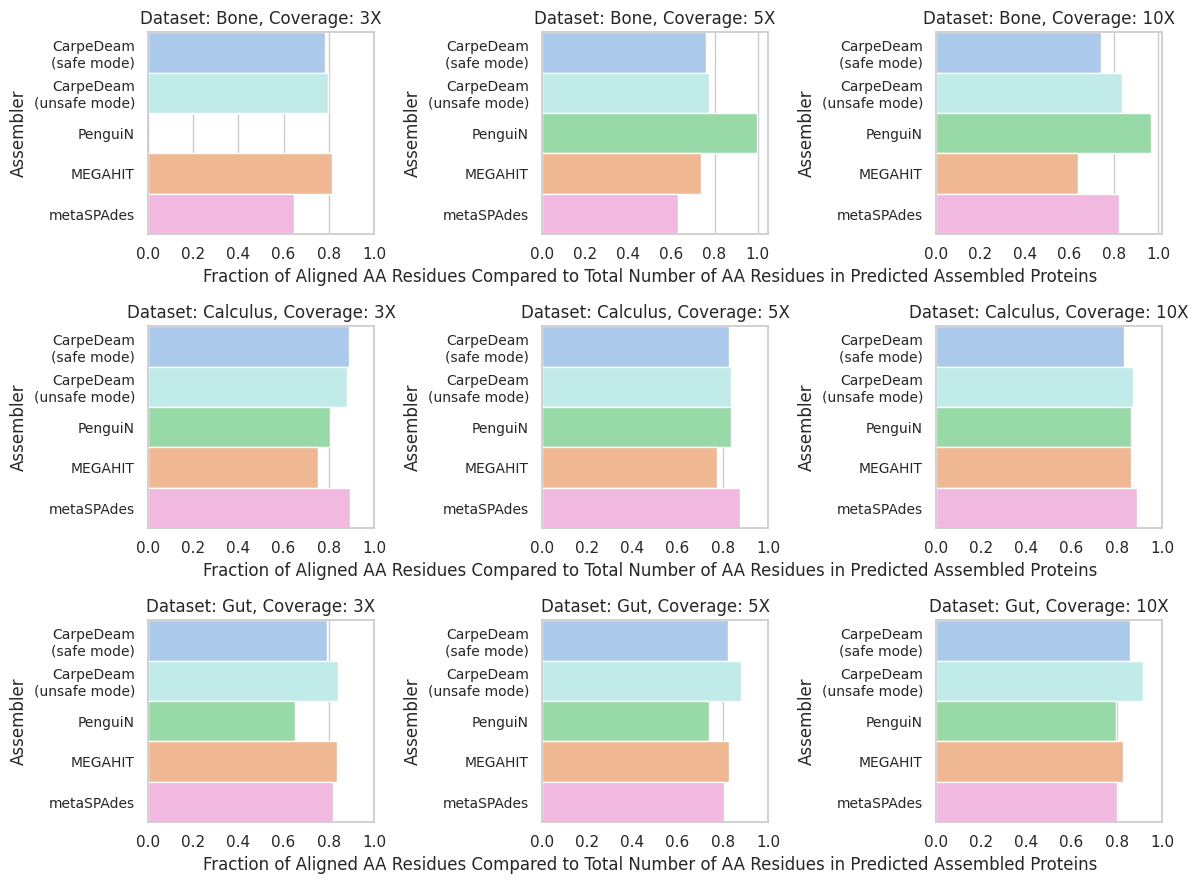

In [21]:
for minGapDF, minGap in zip(minGapDFs, minGapList):
    plot_ratio_noHits(minGapDF, "high", minGap)